In [1]:
#Importamos las dependencias
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
train = pd.read_csv('./titles.csv')
actors = pd.read_csv('./cast.csv')

<Axes: xlabel='year'>

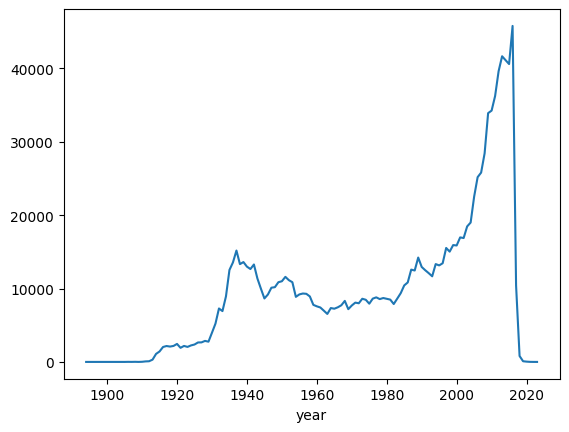

In [11]:
# Graficar la diferencia entre el numero de papeles 
# para actores cada año y el numero de papeles para actrices
# cada año en la historia de la filmografia
diferencia = actors.groupby(['year','type']).size()
diferencia = diferencia.unstack('type').fillna(0)
(diferencia.actor - diferencia.actress).plot()


<Axes: xlabel='year'>

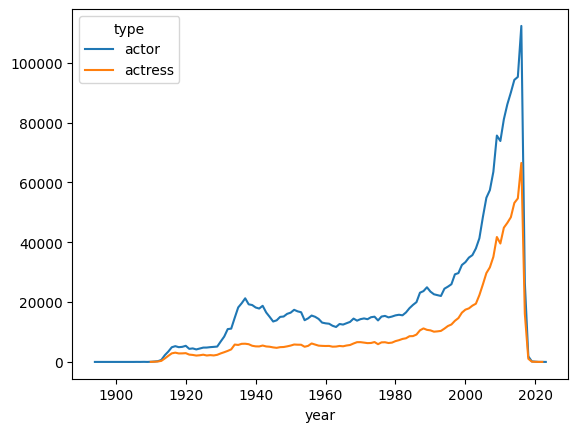

In [12]:
# Graficar en numero de papeles de actores cada año
# y el numero de papeles para actrices cada año
numero = actors.groupby(['year','type']).size()
numero = numero.unstack('type')
numero.plot()


<Axes: xlabel='year'>

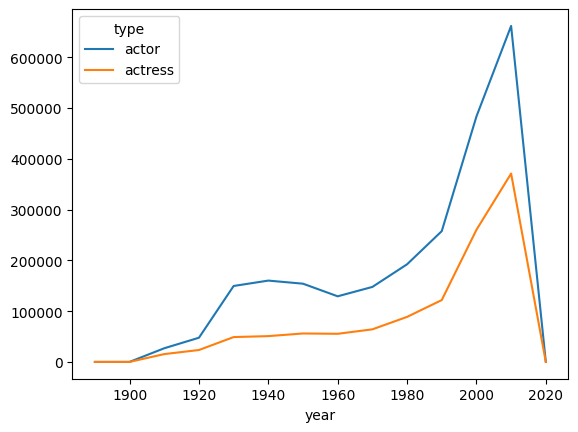

In [18]:
# El mismo grafico anterior pero categorizado por decada y
# con un grafico de area
decada = actors.groupby([actors.year//10*10,'type']).size()
decada = decada.unstack('type')
decada.plot()

<Axes: xlabel='year'>

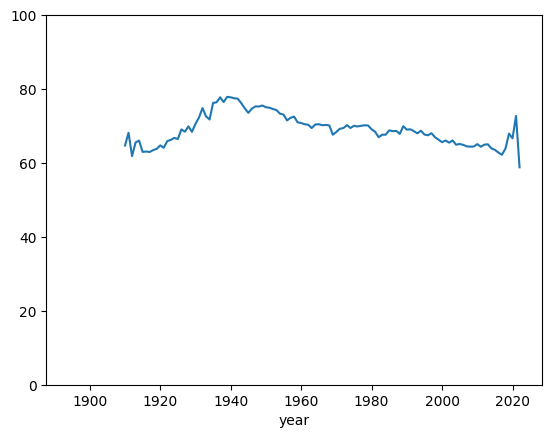

In [19]:
# Graficar el porcentaje de papeles que han sido 
# actores cada año en la historia de la filmografia
porcentaje = actors.groupby(['year','type']).size()
porcentaje = porcentaje.unstack('type')
(porcentaje.actor / (porcentaje.actor + porcentaje.actress) * 100).plot(ylim=[0,100])


<Axes: xlabel='year'>

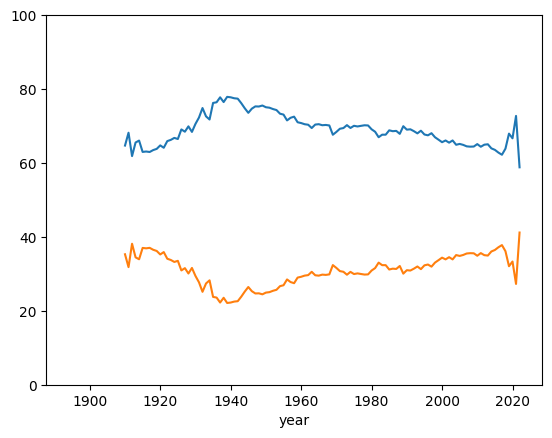

In [20]:
# Graficar el porcentaje de papeles que han sido 
# actores cada año en la historia de la filmografia
# junto al mismo porcentaje pero de actrices

ambos  = actors.groupby(['year','type']).size()
ambos = ambos.unstack('type')
(ambos.actor / (ambos.actor+ambos.actress) * 100).plot(ylim=[0,100],label="porcentaje actor")
(ambos.actress / (ambos.actor+ambos.actress) * 100).plot(ylim=[0,100],label="porcentaje actrices")

<Axes: xlabel='year'>

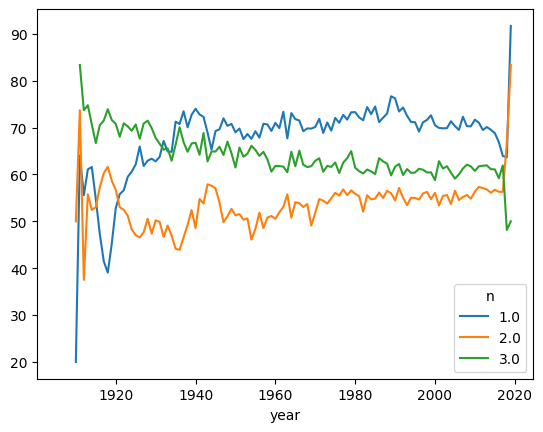

In [24]:
# Graficar 3 lines con clasificacion "n" de 1 al 3 donde cada 
# linea represente el porcentaje de la clasificacion para 
# los papeles de actores en cada año.

clasificacion = actors[actors.n <= 3]
clasificacion = clasificacion.groupby(['year','type','n']).size()
clasificacion = clasificacion.unstack('type')
clasificacion = clasificacion.actor / (clasificacion.actor+clasificacion.actress) * 100
clasificacion = clasificacion.unstack('n')
clasificacion.plot()

<Axes: xlabel='title'>

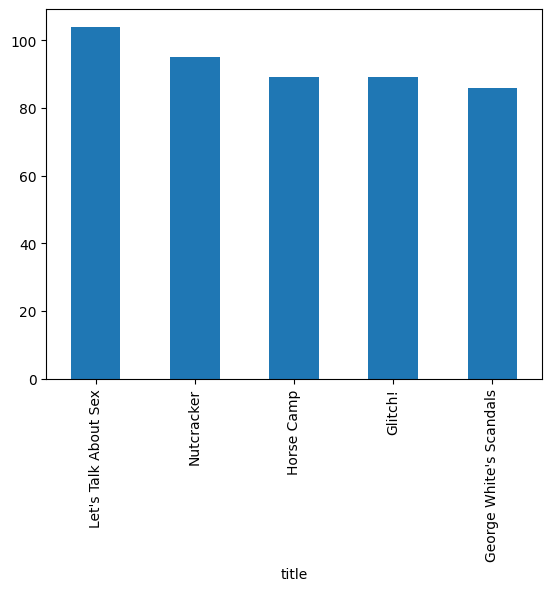

In [26]:
# Encontrar las 5 peliculas de la historia tengan mas
# actrices que actores

#Agrupamos las columnas y sacamos el tamaño
mas_vistas = actors.groupby(['type','title']).size()
#Quitamos la columna type
mas_vistas = mas_vistas.unstack('type')
#Sacamos la diferencia de actrices y de actores y organizamos los valores
mas_vistas = (mas_vistas.actress - mas_vistas.actor).sort_values(ascending=False)
#Seleccionamos los 5 primeros valores y la grafica la volvemos en grafica de barras
mas_vistas[:5].plot(kind='bar')
